# FAST API
Vamos a realizar los 4 ejercicios relacionados con Fast API.

Para ello comenzamos instalando las librerías necesarias.

In [ ]:
!pip install fastapi

In [ ]:
!pip install pyngrok

Hacemos la conexión a fast API mediante NGROK.

In [ ]:
import nest_asyncio
from pyngrok import ngrok, conf
from google.colab import userdata

ngrok.kill()
conf.get_default().auth_token = userdata.get('NGROK_TOKEN')
ngrok_tunell = ngrok.connect(8000)
print('Este es el URL,',ngrok_tunell.public_url)
nest_asyncio.apply()

Este es el URL, https://e9a5-34-19-76-220.ngrok-free.app


Con esto abrimos el puerto de la conexión

In [ ]:
! uvicorn main:app --port 8000

2024-07-13 20:44:13.652974: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-13 20:44:13.653055: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-13 20:44:13.655501: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-13 20:44:13.668747: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-13 20:44:16.272307: W tensorflow/compiler/tf2

Escribimos el main que va a leer `uvicorn` con las 5 funciones a desplegar usando el anaálisis de sentimiento proporcionado por Hugging Face y también el modelo QA.

In [ ]:
%%writefile main.py
from fastapi import FastAPI, Query, Depends, Body
from pydantic import BaseModel
from transformers import pipeline

app = FastAPI()

# Cargamos los pipelines de Hugging Face
sentiment_analysis_pipeline = pipeline("sentiment-analysis")
question_answering_pipeline = pipeline('question-answering', model='BSC-LT/roberta-base-bne-sqac')

# Modelos de Pydantic para solicitudes más complejas
class QARequest(BaseModel):
    context: str
    question: str

# Dependencias
def get_add_params(a: int = Query(..., description="Primer número para sumar"), b: int = Query(..., description="Segundo número para sumar")):
    return {"a": a, "b": b}

def get_multiply_params(a: int = Query(..., description="Primer número para multiplicar"), b: int = Query(..., description="Segundo número para multiplicar")):
    return {"a": a, "b": b}

@app.get("/")
def read_root():
    return {"message": "Bienvenidos a FastAPI"}

@app.get("/Saludo")
def say_hello(name: str = Query(..., description="El nombre al que le diremos hola")):
    return {"message": f"Hola, {name}"}

@app.get("/Suma")
def add(params: dict = Depends(get_add_params)):
    result = params['a'] + params['b']
    return {"resultado": result}

@app.get("/Multiplica")
def multiply(params: dict = Depends(get_multiply_params)):
    result = params['a'] * params['b']
    return {"resultado": result}

@app.get("/Analisis Sentimiento")
def analyze_sentiment(text: str = Query(..., description="Texto para analizar el sentimiento")):
    result = sentiment_analysis_pipeline(text)
    return {"sentimiento": result}

@app.post("/Preguntas y respuestas")
def answer_question(request: QARequest = Body(...)):
    result = question_answering_pipeline(question=request.question, context=request.context)
    return {"respuesta": result}


Overwriting main.py


Captura de pantalla de la app `Saludo`:

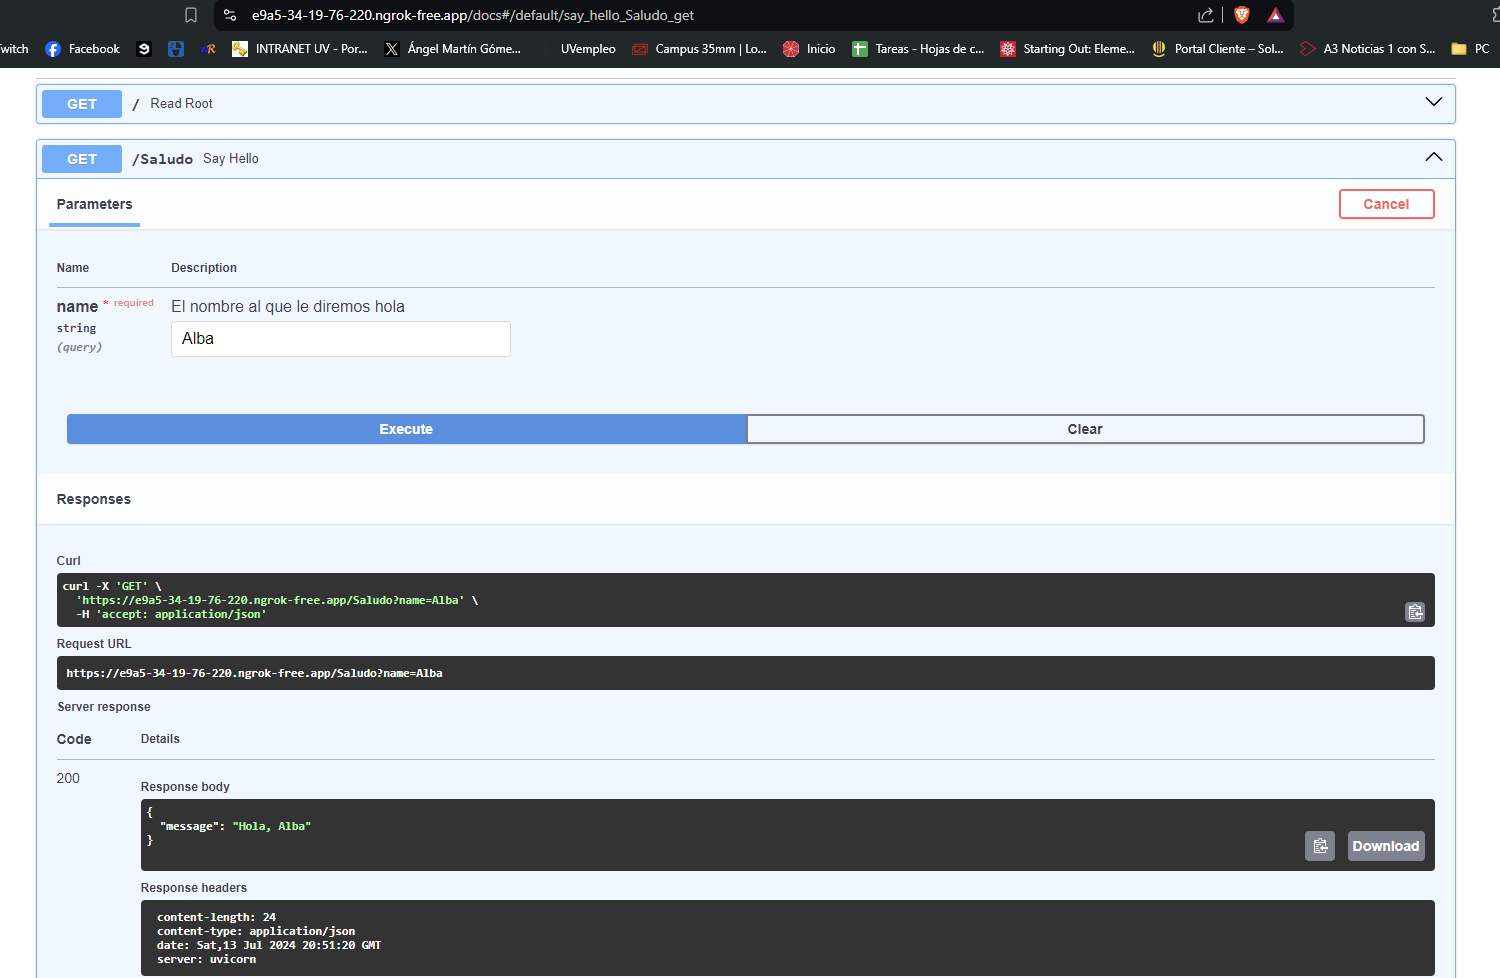

Captura de pantalla de la app `Suma`:

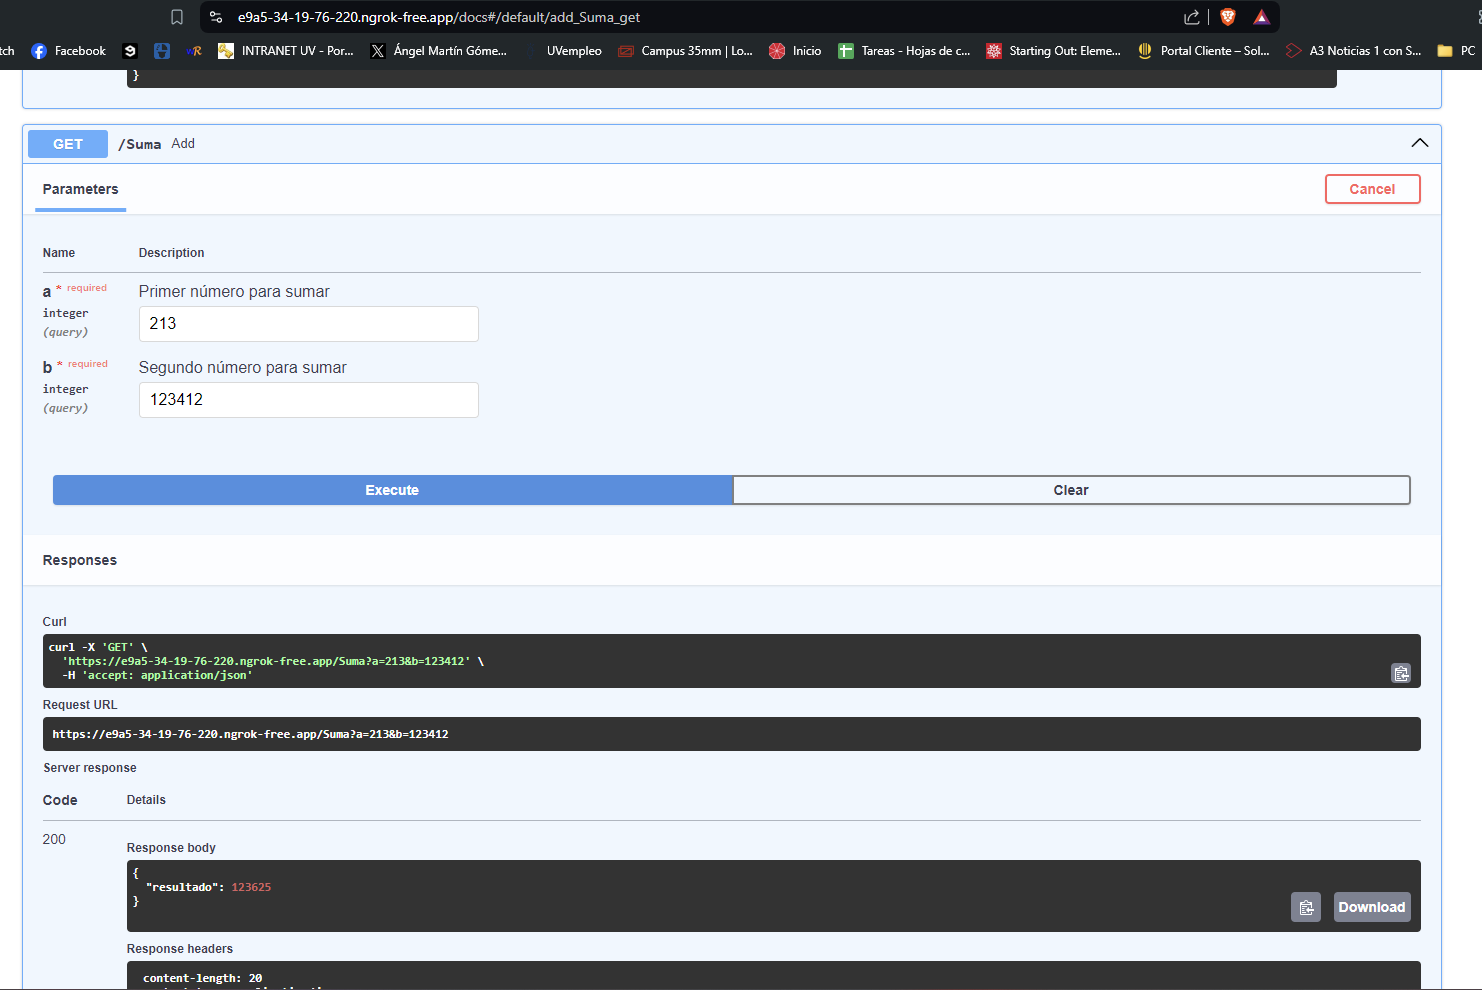

Captura de pantalla de la app `Multiplica`:

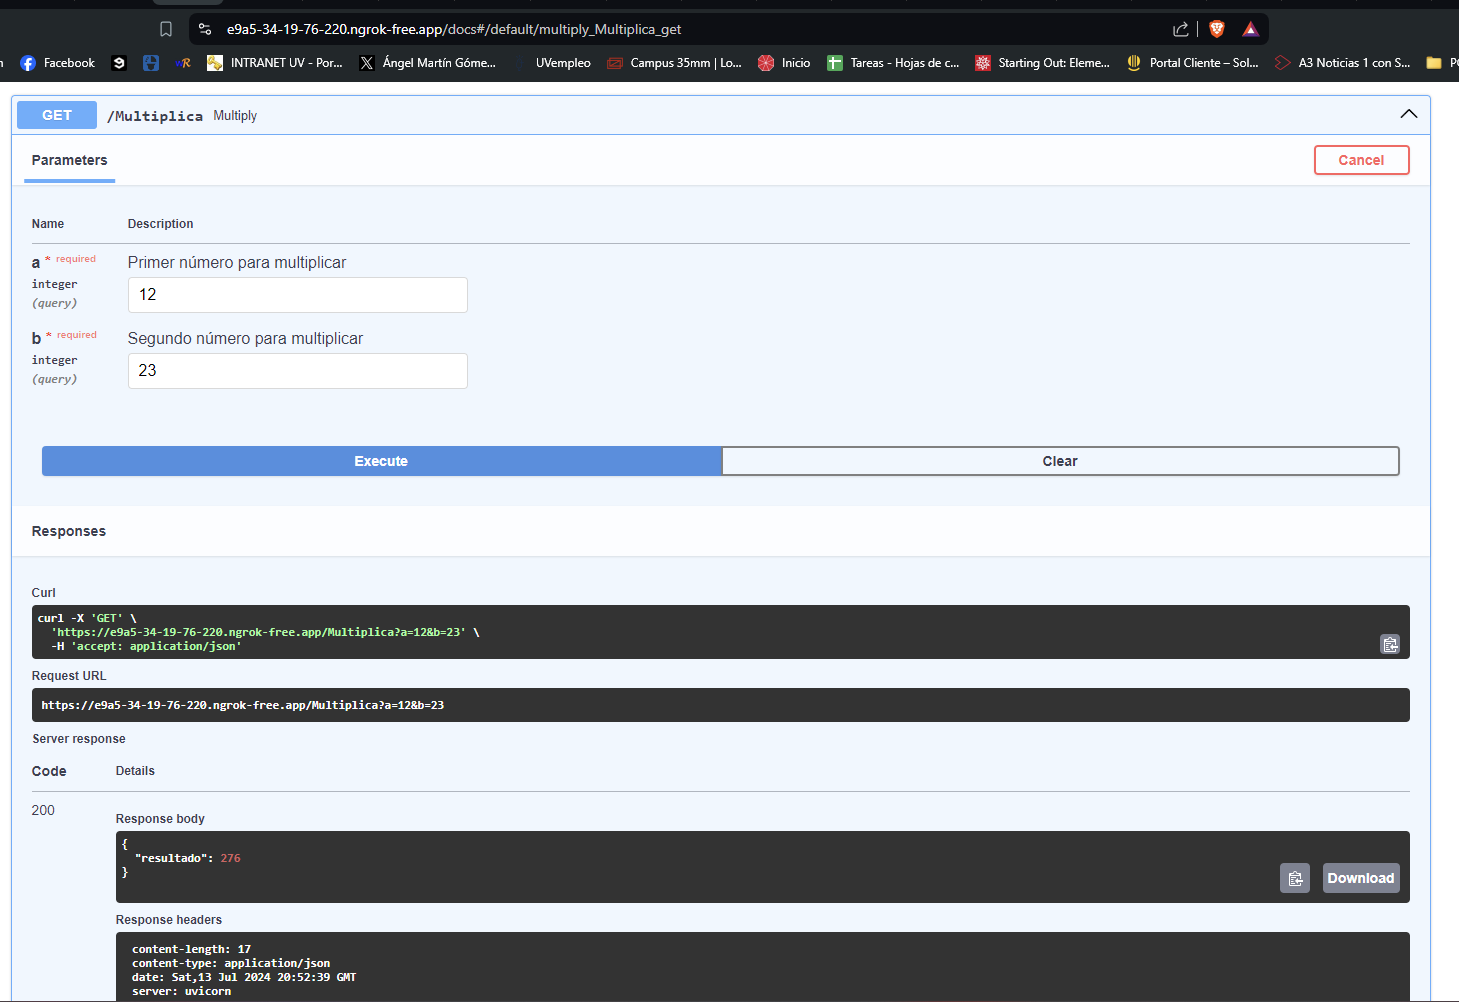

Captura de pantalla de la app `Analisis Sentimiento`:

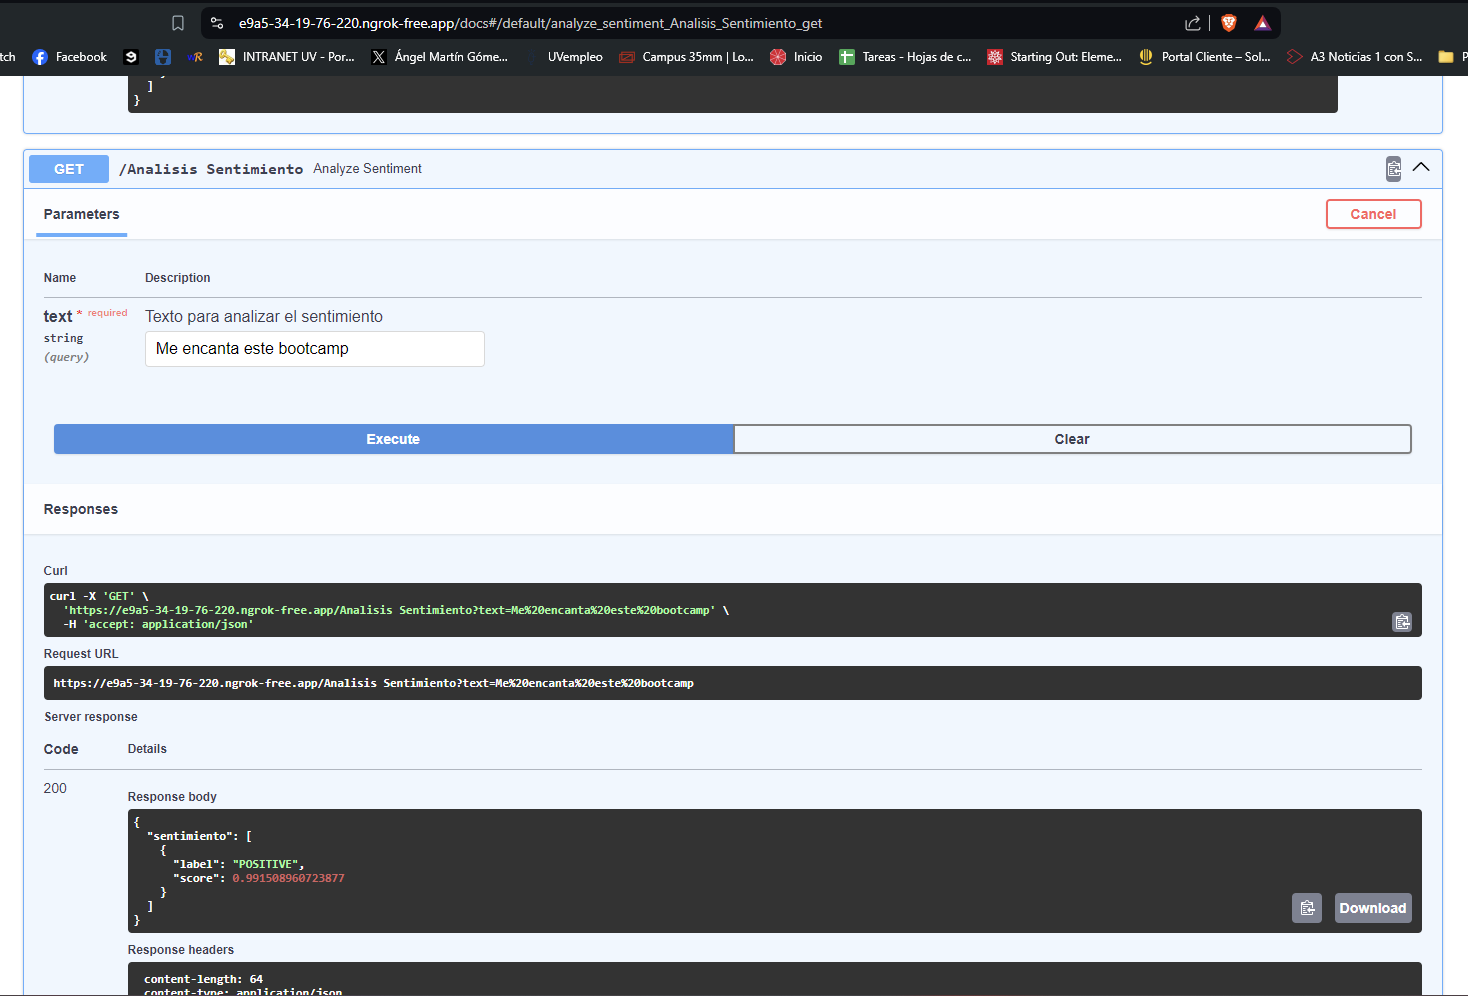

Capturas de pantalla de la app `Preguntas y respuestas`:

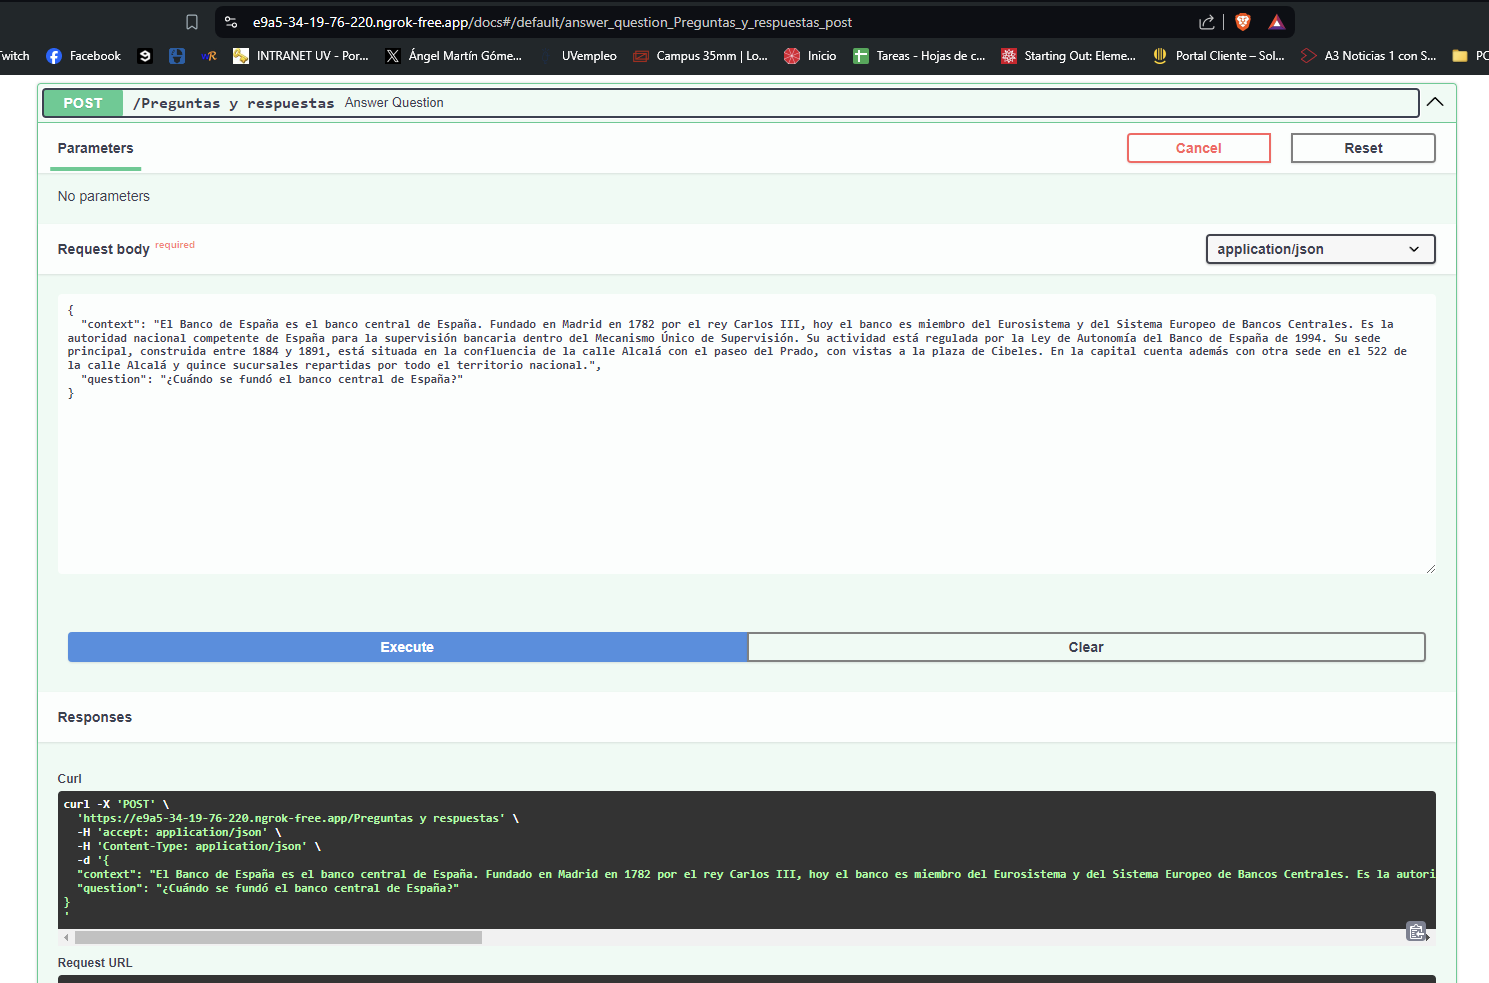

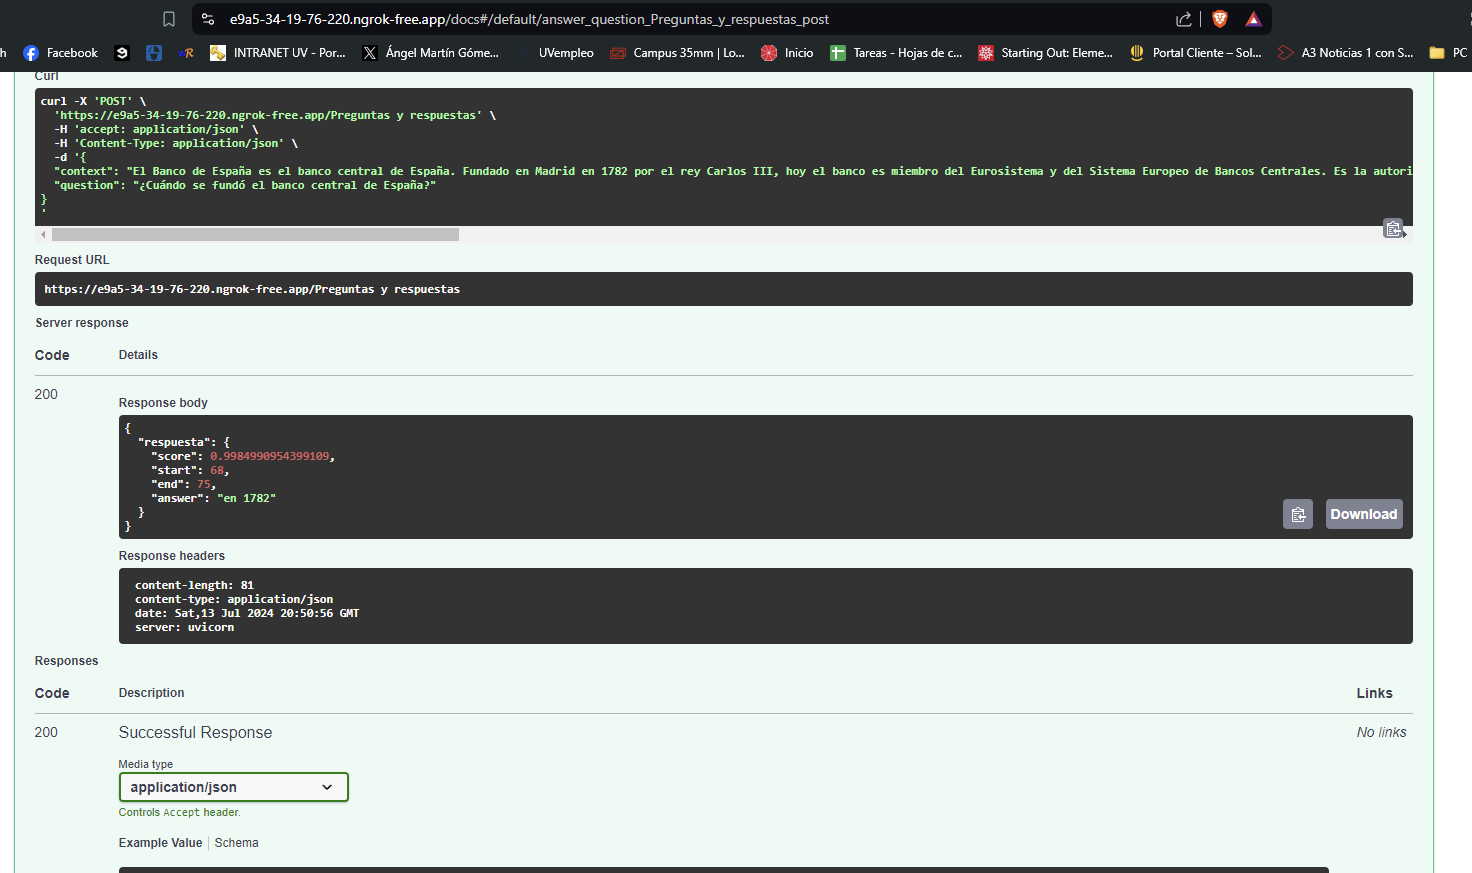